In [44]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.cm as cm
import cv2 as cv
from sklearn.metrics import mean_squared_error
import os

In [45]:

def Bilateral_filter(image, mask_size, k_g, sigma_g, k_h, sigma_h):
    # Normalize pixel intensities before applying Gaussian function
    image = np.asarray(image)
    image = (image - np.min(image)) / (np.max(image) - np.min(image))
    row, col = image.shape
    
    # Pad the image with zeros
    image_padded = np.pad(image, ((int(mask_size/2),int(mask_size/2)), (int(mask_size/2),int(mask_size/2))))
    
    output_image1 = np.zeros_like(image)
    output_image2 = np.zeros_like(image)
    
    # Loop through each pixel in the image
    for i in range(row):
        for j in range(col):
            # Define pixel neighbourhood
            neighbourhood = image_padded[i:i+mask_size, j:j+mask_size]
            
            # Calculate Gaussian weights for color similarity
            gaussian_color = k_h*np.exp(-(neighbourhood - image[i, j])**2 / (2 * sigma_h**2))
            
            # Calculate Gaussian weights for spatial similarity
            xx, yy = np.meshgrid(np.arange(i-int(mask_size/2), i+int(mask_size/2)+1), np.arange(j-int(mask_size/2), j+int(mask_size/2)+1))
            gaussian_spatial = k_g*np.exp(-((xx-i)**2 + (yy-j)**2) / (2 * sigma_g**2))
            
            # Calculate bilateral filter weights
            bilateral_weight = gaussian_color * gaussian_spatial
            
            # Calculate normalized bilateral filter weights
            bilateral_weight = bilateral_weight / np.sum(bilateral_weight)
            
            # Apply the bilateral filter to the pixel
            output_image1[i, j] = np.sum(neighbourhood * bilateral_weight)
            
            # Apply the bilateral filter to the pixel after applying a gain factor
            output_image2[i, j] = np.sum(neighbourhood * (gaussian_spatial/np.sum(gaussian_spatial)))
    
  
    output_image1 = (output_image1 - np.min(output_image1)) / (np.max(output_image1) - np.min(output_image1))
    output_image2 = (output_image2 - np.min(output_image2)) / (np.max(output_image2) - np.min(output_image2))

    return output_image1, output_image2


In [46]:
def MSE(filtered_Image,Original_Image):
    MSE = mean_squared_error(filtered_Image, Original_Image)
    return MSE

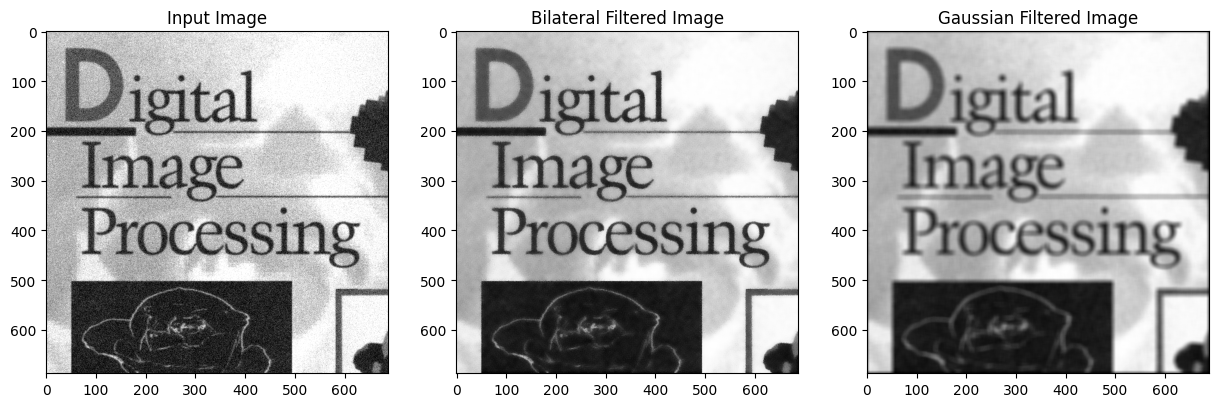

In [47]:
image = Image.open(r"E:\A10-11\A10\noisybook.png")
# mask_size = int(input('mask size of the filter: '))
mask_size = 11
k_g = 1         # for spatial Gaussian
sigma_g = 50    # for spatial Gaussian
k_h = 1         # for colored similarity Gaussian
sigma_h = 0.2   # for colored similarity Gaussian
output_image1 , output_image2 = Bilateral_filter(image, mask_size, k_g, sigma_g, k_h, sigma_h)
fig, axs = plt.subplots(1,3,figsize = (15,15))

plt.subplot(131).set_title('Input Image')
plt.imshow(image, cmap = 'gray')
plt.subplot(132)
plt.subplot(132).set_title('Bilateral Filtered Image')
plt.imshow(output_image1, cmap='gray')
plt.subplot(133)
plt.subplot(133).set_title('Gaussian Filtered Image')
plt.imshow(output_image2, cmap='gray')
plt.show()


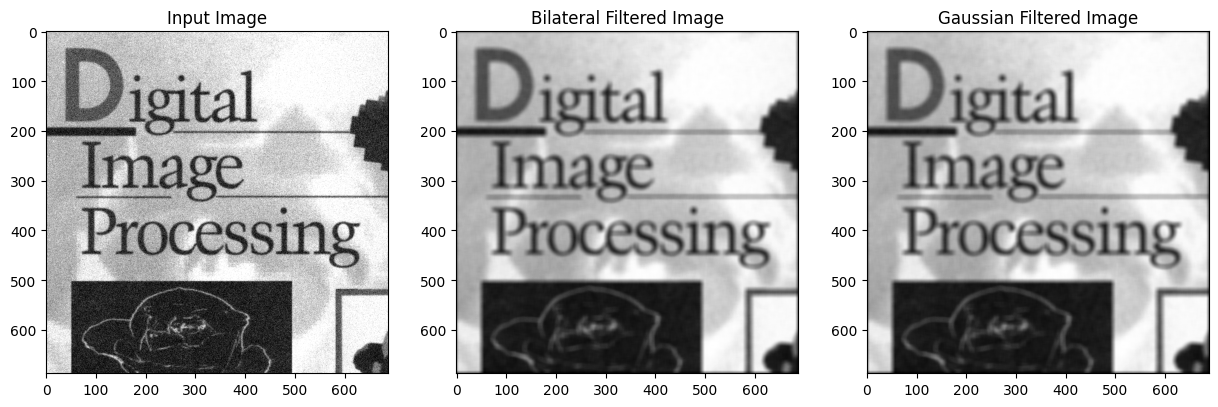

MSE_with_Bilateral_filter =  0.0066145756
MSE_with_Gaussian_filter = 0.006961204


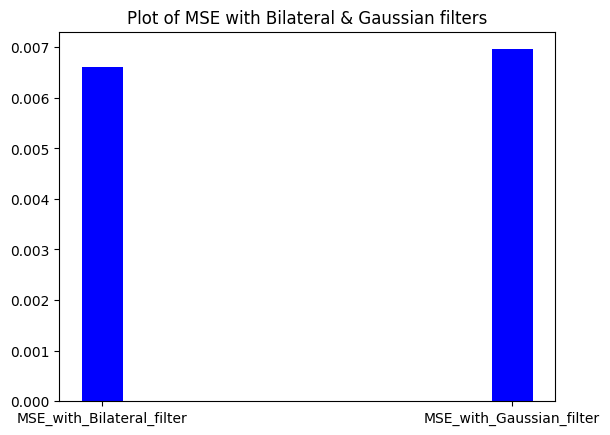

In [50]:
sigmas = [1,2,4,8,10,20]
MSE_b =[]
MSE_g = []
k_g = 1
k_h =1
image = Image.open(r"E:\A10-11\A10\noisybook.png")
mask_size = 11
for sigma in sigmas:
    image = Image.open(r"E:\A10-11\A10\noisybook.png")

    sigma_g = sigma    # for spatial Gaussian
    sigma_h = sigma   # for colored similarity Gaussian
    output_image1 , output_image2 = Bilateral_filter(image, mask_size, k_g, sigma_g, k_h, sigma_h)
    MSE_b_i = MSE(output_image1, image)
    MSE_b = np.append(MSE_b,MSE_b_i)
    MSE_g_i = MSE(output_image2, image)
    MSE_g = np.append(MSE_g,MSE_g_i)

MSE_b_min = np.min(MSE_b)
MSE_b_min_index = np.argmin(MSE_b)
Sigma_MSE_b_min = sigmas[MSE_b_min_index]

MSE_g_min = np.min(MSE_g)
MSE_g_min_index = np.argmin(MSE_g)
Sigma_MSE_g_min = sigmas[MSE_g_min_index]

output_imageb , output_imageg = Bilateral_filter(image, mask_size, k_g, Sigma_MSE_g_min, k_h, Sigma_MSE_b_min)

fig, axs = plt.subplots(1,3,figsize = (15,15))

plt.subplot(131).set_title('Input Image')
plt.imshow(image, cmap = 'gray')
plt.subplot(132)
plt.subplot(132).set_title('Bilateral Filtered Image')
plt.imshow(output_image1, cmap='gray')
plt.subplot(133)
plt.subplot(133).set_title('Gaussian Filtered Image')
plt.imshow(output_image2, cmap='gray')
plt.show()

MSE_with_Bilateral_filter = MSE(output_imageb,image)
MSE_with_Gaussian_filter = MSE(output_imageg,image)
print('MSE_with_Bilateral_filter = ', MSE(output_imageb,image))
print('MSE_with_Gaussian_filter =', MSE(output_imageg,image))

bins = np.array(['MSE_with_Bilateral_filter', 'MSE_with_Gaussian_filter'])
x = np.array([MSE_with_Bilateral_filter, MSE_with_Gaussian_filter])
plt.bar(bins,x,color='blue',width=0.1)
plt.title('Plot of MSE with Bilateral & Gaussian filters')
plt.show()

        

MSE_with_Bilateral_filter =  0.01431044
MSE_with_Gaussian_filter = 0.014315


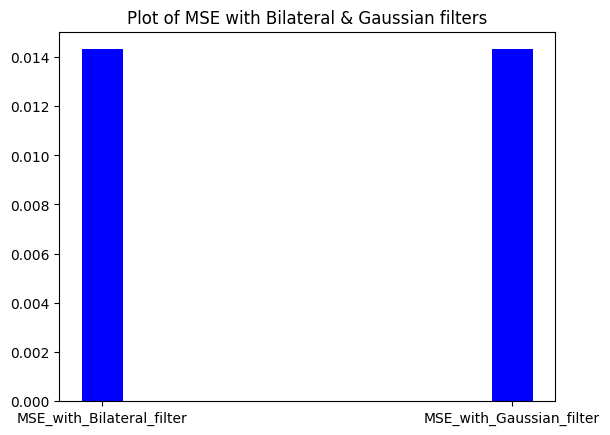

In [49]:


MSE_with_Bilateral_filter = MSE(output_image1,image)
MSE_with_Gaussian_filter = MSE(output_image2,image)
print('MSE_with_Bilateral_filter = ', MSE(output_image1,image))
print('MSE_with_Gaussian_filter =', MSE(output_image2,image))

bins = np.array(['MSE_with_Bilateral_filter', 'MSE_with_Gaussian_filter'])
x = np.array([MSE_with_Bilateral_filter, MSE_with_Gaussian_filter])
plt.bar(bins,x,color='blue',width=0.1)
plt.title('Plot of MSE with Bilateral & Gaussian filters')
plt.show()
